In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
from pprint import pprint
import requests
import gmaps
import os

print(os.listdir("/Users/aribuenrostro/Project_1/Traffic_Camera_Citations.csv"))

NotADirectoryError: [Errno 20] Not a directory: '/Users/aribuenrostro/Project_1/Traffic_Camera_Citations.csv'

In [2]:
#import csv file
NOLA_df = pd.read_csv("/Users/aribuenrostro/Project_1/Traffic_Camera_Citations.csv")
NOLA_df.head(10)

/Users/aribuenrostro/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Vio_DateTime,Notice_Number,site_id,location,Vio_Type_Code,Vio_Evnt_Speed,Recipient_City,Recipient_State,Recipient_Zip_Code
0,04/01/2008 12:42:16 AM,800800001847,NO01,SB N CARROLLTON AVE @ CANAL ST,RDLT,14,NEW ORLEANS,LA,70119
1,04/01/2008 02:25:24 AM,800800001854,NO03,NB S CARROLLTON AVE @ PALMETTO ST,RDLT,32,LOS ANGELES,LA,90066
2,04/01/2008 07:21:42 AM,800800001862,NO01,SB N CARROLLTON AVE @ CANAL ST,RDLT,17,NEW ORLEANS,LA,70126
3,04/01/2008 07:53:40 AM,800800001870,NO05,NB S CARROLLTON AVE @ EARHART BLVD,RDLT,24,METAIRIE,LA,70003
4,04/01/2008 07:57:57 AM,800800001888,NO09,EB POYDRAS ST @ LOYOLA AVE,RDLT,19,NEW ORLEANS,LA,70117
5,04/01/2008 08:09:55 AM,800800001896,NO01,SB N CARROLLTON AVE @ CANAL ST,RDLT,18,HOUSTON,TX,77036
6,04/01/2008 08:23:58 AM,800800001904,NO03,NB S CARROLLTON AVE @ PALMETTO ST,RDLT,34,NEW ORLEANS,LA,70115
7,04/01/2008 08:31:27 AM,800800001912,NO03,NB S CARROLLTON AVE @ PALMETTO ST,RDLT,30,NEW ORLEANS,LA,70118
8,04/01/2008 08:33:23 AM,800800001920,NO07,WB EARHART BLVD @ S CARROLLTON AVE,RDLT,13,LA PLACE,LA,70068
9,04/01/2008 09:06:10 AM,800800001938,NO01,SB N CARROLLTON AVE @ CANAL ST,RDLT,15,NEW ORLEANS,LA,70119


In [3]:
NOLA_df.dropna()
NOLA_df.head(3)

,Vio_DateTime,Notice_Number,site_id,location,Vio_Type_Code,Vio_Evnt_Speed,Recipient_City,Recipient_State,Recipient_Zip_Code
0,04/01/2008 12:42:16 AM,800800001847,NO01,SB N CARROLLTON AVE @ CANAL ST,RDLT,14,NEW ORLEANS,LA,70119
1,04/01/2008 02:25:24 AM,800800001854,NO03,NB S CARROLLTON AVE @ PALMETTO ST,RDLT,32,LOS ANGELES,LA,90066
2,04/01/2008 07:21:42 AM,800800001862,NO01,SB N CARROLLTON AVE @ CANAL ST,RDLT,17,NEW ORLEANS,LA,70126


In [4]:
NOLA_df.describe()

,Notice_Number,Vio_Evnt_Speed
count,3.081600e+06,3.081600e+06
mean,8.015057e+11,3.251418e+01
std,3.248998e+08,1.839897e+01
min,8.008000e+11,0.000000e+00
25%,8.012015e+11,2.600000e+01
50%,8.016007e+11,3.100000e+01
75%,8.018021e+11,4.200000e+01
max,8.019049e+11,9.830000e+02


In [6]:
NOLA_df.dtypes

Vio_DateTime          object
Notice_Number          int64
site_id               object
location              object
Vio_Type_Code         object
Vio_Evnt_Speed         int64
Recipient_City        object
Recipient_State       object
Recipient_Zip_Code    object
dtype: object

In [42]:
date_df = NOLA_df[['Vio_DateTime',]]
data2_df = date_df.iloc[:10]
#type(data2_df)
pd.to_datetime(data2_df['Vio_DateTime']).dt.date

0    2008-04-01
1    2008-04-01
2    2008-04-01
3    2008-04-01
4    2008-04-01
5    2008-04-01
6    2008-04-01
7    2008-04-01
8    2008-04-01
9    2008-04-01
Name: Vio_DateTime, dtype: object

In [44]:
NOLA_df['date'] = pd.to_datetime(NOLA_df['Vio_DateTime']).dt.date
NOLA_df.head()

,Vio_DateTime,Notice_Number,site_id,location,Vio_Type_Code,Vio_Evnt_Speed,Recipient_City,Recipient_State,Recipient_Zip_Code,date
0,04/01/2008 12:42:16 AM,800800001847,NO01,SB N CARROLLTON AVE @ CANAL ST,RDLT,14,NEW ORLEANS,LA,70119,2008-04-01
1,04/01/2008 02:25:24 AM,800800001854,NO03,NB S CARROLLTON AVE @ PALMETTO ST,RDLT,32,LOS ANGELES,LA,90066,2008-04-01
2,04/01/2008 07:21:42 AM,800800001862,NO01,SB N CARROLLTON AVE @ CANAL ST,RDLT,17,NEW ORLEANS,LA,70126,2008-04-01
3,04/01/2008 07:53:40 AM,800800001870,NO05,NB S CARROLLTON AVE @ EARHART BLVD,RDLT,24,METAIRIE,LA,70003,2008-04-01
4,04/01/2008 07:57:57 AM,800800001888,NO09,EB POYDRAS ST @ LOYOLA AVE,RDLT,19,NEW ORLEANS,LA,70117,2008-04-01


In [55]:
NOLA_df["Month"] = pd.DatetimeIndex(NOLA_df['date']).month
NOLA_df

,Vio_DateTime,Notice_Number,site_id,location,Vio_Type_Code,Vio_Evnt_Speed,Recipient_City,Recipient_State,Recipient_Zip_Code,date,Month,Hour
0,04/01/2008 12:42:16 AM,800800001847,NO01,SB N CARROLLTON AVE @ CANAL ST,RDLT,14,NEW ORLEANS,LA,70119,2008-04-01,4,0
1,04/01/2008 02:25:24 AM,800800001854,NO03,NB S CARROLLTON AVE @ PALMETTO ST,RDLT,32,LOS ANGELES,LA,90066,2008-04-01,4,2
2,04/01/2008 07:21:42 AM,800800001862,NO01,SB N CARROLLTON AVE @ CANAL ST,RDLT,17,NEW ORLEANS,LA,70126,2008-04-01,4,7
3,04/01/2008 07:53:40 AM,800800001870,NO05,NB S CARROLLTON AVE @ EARHART BLVD,RDLT,24,METAIRIE,LA,70003,2008-04-01,4,7
4,04/01/2008 07:57:57 AM,800800001888,NO09,EB POYDRAS ST @ LOYOLA AVE,RDLT,19,NEW ORLEANS,LA,70117,2008-04-01,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3081595,07/03/2019 03:03:28 PM,801902986448,NO03,NB S CARROLLTON AVE @ PALMETTO ST,RDLT,37,COLUMBUS,OH,43232,2019-07-03,7,15
3081596,05/25/2019 06:53:13 AM,801902641696,NO09,EB POYDRAS ST @ LOYOLA AVE,RDLT,30,BELLE CHASSE,LA,70037,2019-05-25,5,6
3081597,07/20/2019 08:17:01 PM,801903052000,NO03,NB S CARROLLTON AVE @ PALMETTO ST,RDLT,31,KENNER,LA,70065,2019-07-20,7,20
3081598,06/24/2019 02:44:56 PM,801902945667,NOLV121B,SB 2000 NAPOLEON AVE,SPEEDVAN,44,NEW ORLEANS,LA,70115,2019-06-24,6,14


In [252]:
NOLA_df["Hour"] = pd.DatetimeIndex(NOLA_df['Vio_DateTime']).hour
NOLA_df

,Vio_DateTime,Notice_Number,site_id,location,Vio_Type_Code,Vio_Evnt_Speed,Recipient_City,Recipient_State,Recipient_Zip_Code,date,Month,Hour
0,04/01/2008 12:42:16 AM,800800001847,NO01,SB N CARROLLTON AVE @ CANAL ST,RDLT,14,NEW ORLEANS,LA,70119,2008-04-01,4,0
1,04/01/2008 02:25:24 AM,800800001854,NO03,NB S CARROLLTON AVE @ PALMETTO ST,RDLT,32,LOS ANGELES,LA,90066,2008-04-01,4,2
2,04/01/2008 07:21:42 AM,800800001862,NO01,SB N CARROLLTON AVE @ CANAL ST,RDLT,17,NEW ORLEANS,LA,70126,2008-04-01,4,7
3,04/01/2008 07:53:40 AM,800800001870,NO05,NB S CARROLLTON AVE @ EARHART BLVD,RDLT,24,METAIRIE,LA,70003,2008-04-01,4,7
4,04/01/2008 07:57:57 AM,800800001888,NO09,EB POYDRAS ST @ LOYOLA AVE,RDLT,19,NEW ORLEANS,LA,70117,2008-04-01,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3081595,07/03/2019 03:03:28 PM,801902986448,NO03,NB S CARROLLTON AVE @ PALMETTO ST,RDLT,37,COLUMBUS,OH,43232,2019-07-03,7,15
3081596,05/25/2019 06:53:13 AM,801902641696,NO09,EB POYDRAS ST @ LOYOLA AVE,RDLT,30,BELLE CHASSE,LA,70037,2019-05-25,5,6
3081597,07/20/2019 08:17:01 PM,801903052000,NO03,NB S CARROLLTON AVE @ PALMETTO ST,RDLT,31,KENNER,LA,70065,2019-07-20,7,20
3081598,06/24/2019 02:44:56 PM,801902945667,NOLV121B,SB 2000 NAPOLEON AVE,SPEEDVAN,44,NEW ORLEANS,LA,70115,2019-06-24,6,14


In [213]:
NOLA_grp_df ['date']= pd.to_datetime(NOLA_grp_df ['date'])

In [271]:
#Number of citations per year
citation_count_df = NOLA_grp_df.groupby(NOLA_grp_df.date.dt.year).count()
citation_count_df
citation_count_df.to_csv("NOLA_Citation_Year.csv")

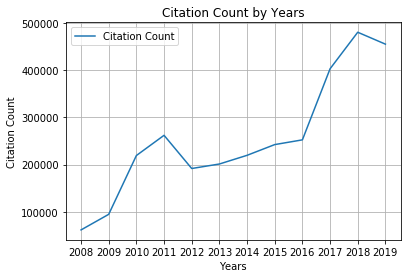

In [263]:
#Number of citations per year
plt.grid(True)
plt.ylabel("Citation Count")
plt.xlabel("Years")
plt.title("Citation Count by Years")
plt.plot(citation_count_df.index , citation_count_df ['Citation Count'], label = "Citation Count")
plt.legend(frameon=True)
plt.xticks(np.arange(2008, 2020,1))
plt.savefig('Citation Count by Years.png') 
plt.show()


In [272]:
#Number of citations per date
citation_date_df = NOLA_df.groupby('date')[['Vio_DateTime']].count()
citation_date_df
citation_date_df.to_csv("NOLA_by_day.csv")

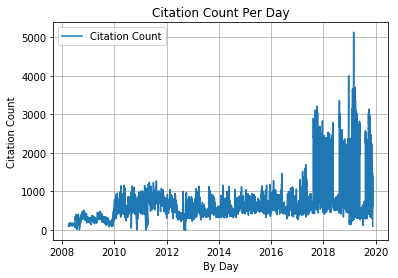

<Figure size 1584x432 with 0 Axes>

In [278]:
#Number of citations per date
plt.grid(True)
plt.ylabel("Citation Count")
plt.xlabel("By Day")
plt.title("Citation Count Per Day")
plt.plot(citation_date_df.index, citation_date_df ['Vio_DateTime'], label = "Citation Count",)
plt.legend(frameon=True)
plt.figure(figsize=(22,6))
plt.savefig('Number of citations per day.png') 
plt.show()

In [277]:
#Number of citations by the hour
citation_hour_df = NOLA_df.groupby('Hour')[['Vio_DateTime']].count()
citation_hour_df

,Vio_DateTime
Hour,
0,38765
1,33817
2,25829
3,25000
4,22509
5,26836
6,49086
7,223679
8,372613


In [ ]:
citation_hour_df.to_csv("NOLA_by_hour.csv")

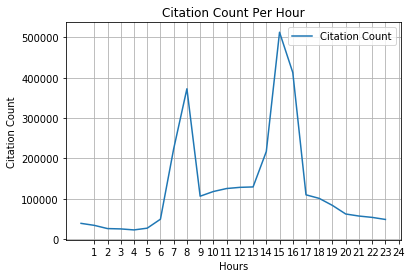

<Figure size 1584x432 with 0 Axes>

In [276]:
#Number of citations per hour
plt.grid(True)
plt.ylabel("Citation Count")
plt.xlabel("Hours")
plt.title("Citation Count Per Hour")
plt.plot(citation_hour_df.index, citation_hour_df ['Vio_DateTime'], label = "Citation Count",)
plt.legend(frameon=True)
plt.xticks(np.arange(1, 25,1))
plt.figure(figsize=(22,6))
plt.savefig('Number of citations per hour.png') 
plt.show()

In [274]:
#Groupby month and citation count
citation_month_df = NOLA_df.groupby('Month')[['Vio_DateTime']].count()
citation_month_df
citation_month_df.to_csv("NOLA_by_month.csv")

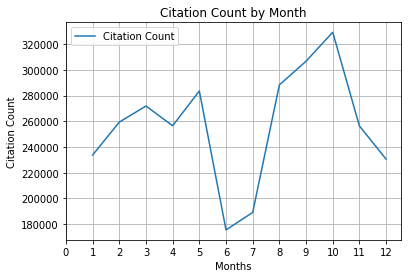

In [259]:
#Number of citations per month
plt.grid(True)
plt.ylabel("Citation Count")
plt.xlabel("Months")
plt.title("Citation Count by Month")
plt.plot(citation_month_df.index , citation_month_df['Vio_DateTime'], label = "Citation Count")
plt.legend(frameon=True)
plt.xticks(np.arange(0,13))
plt.savefig('Citation Count by Month.png') 
plt.show()